In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
train=pd.read_csv("/content/drive/MyDrive/NEW GMAIL ACC RELATED/mitbih_train.csv", header=None)
test=pd.read_csv("/content/drive/MyDrive/NEW GMAIL ACC RELATED/mitbih_test.csv", header=None)
abnormal=pd.read_csv("/content/drive/MyDrive/NEW GMAIL ACC RELATED/ptbdb_abnormal.csv", header=None)
normal=pd.read_csv("/content/drive/MyDrive/NEW GMAIL ACC RELATED/ptbdb_normal.csv", header=None)

In [4]:
abnormal[187]=5
normal[187]=6

In [6]:
merged_data=pd.concat([train, test, abnormal, normal])

In [7]:
#Finding the outliers
continous_features =   merged_data[187].unique()
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            merged_data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(merged_data[continous_features])

For the feature 0, No of Outliers is 16238
For the feature 1, No of Outliers is 6857
For the feature 2, No of Outliers is 0
For the feature 3, No of Outliers is 3244
For the feature 4, No of Outliers is 9434
For the feature 5, No of Outliers is 5969
For the feature 6, No of Outliers is 4627


In [8]:
#Removing the outliers
outliers(merged_data[continous_features], drop=True)

Outliers from 0 feature removed
Outliers from 1 feature removed
Outliers from 2 feature removed
Outliers from 3 feature removed
Outliers from 4 feature removed
Outliers from 5 feature removed
Outliers from 6 feature removed


In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import random
import matplotlib.pyplot as plt
import seaborn as sns
merged_data_lbl0 = resample(merged_data[merged_data[187]==0], replace=True, n_samples=15000, random_state=113)
merged_data_lbl1 = resample(merged_data[merged_data[187]==1], replace=True, n_samples=15000, random_state=113)
merged_data_lbl2 = resample(merged_data[merged_data[187]==2], replace=True, n_samples=15000, random_state=113)
merged_data_lbl3 = resample(merged_data[merged_data[187]==3], replace=True, n_samples=15000, random_state=113)
merged_data_lbl4 = resample(merged_data[merged_data[187]==4], replace=True, n_samples=15000, random_state=113)

In [10]:
merged_data= pd.concat([merged_data_lbl0, merged_data_lbl1, merged_data_lbl2, merged_data_lbl3, merged_data_lbl4])

labels = merged_data[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

Count in each label: 
0    15000
1    15000
2    15000
3    15000
4    15000
Name: 187, dtype: int64


In [11]:
from xgboost import XGBRFClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std
from numpy import mean

In [12]:
x=merged_data.iloc[:, 1:-1].values
y=merged_data.iloc[:, -1].values
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [13]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [14]:
param = {
'max_depth': 5, # the maximum depth of each tree
'eta': 0.3, # the training step for each iteration
'silent': 1, # logging mode - quiet
'objective': 'multi:softprob', # error evaluation for multiclass training
'num_class': 7} # the number of classes that exist in this datset
num_round = 200 # the number of training iterations


In [15]:
bst = xgb.train(param, dtrain, num_round)

In [16]:
# make prediction
preds = bst.predict(dtest)
preds_rounded = np.argmax(preds, axis=1)
print(accuracy_score(y_test, preds_rounded))

0.9942626262626263


LEARNING CURVE

In [17]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [18]:
# fit model on training data
model = XGBClassifier()
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set,verbose=True)

[0]	validation_0-merror:0.225353	validation_0-mlogloss:1.47577	validation_1-merror:0.227596	validation_1-mlogloss:1.47673
[1]	validation_0-merror:0.214905	validation_0-mlogloss:1.36644	validation_1-merror:0.21503	validation_1-mlogloss:1.36803
[2]	validation_0-merror:0.207841	validation_0-mlogloss:1.27524	validation_1-merror:0.211475	validation_1-mlogloss:1.27787
[3]	validation_0-merror:0.202587	validation_0-mlogloss:1.19458	validation_1-merror:0.205576	validation_1-mlogloss:1.19778
[4]	validation_0-merror:0.199303	validation_0-mlogloss:1.1248	validation_1-merror:0.202182	validation_1-mlogloss:1.12863
[5]	validation_0-merror:0.193711	validation_0-mlogloss:1.06258	validation_1-merror:0.197697	validation_1-mlogloss:1.06713
[6]	validation_0-merror:0.191821	validation_0-mlogloss:1.00821	validation_1-merror:0.19499	validation_1-mlogloss:1.01319
[7]	validation_0-merror:0.189851	validation_0-mlogloss:0.959742	validation_1-merror:0.192929	validation_1-mlogloss:0.96472
[8]	validation_0-merror:0.

XGBClassifier(objective='multi:softprob')

In [19]:
# make predictions for test data
predictions = model.predict(x_test)

In [20]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

In [21]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

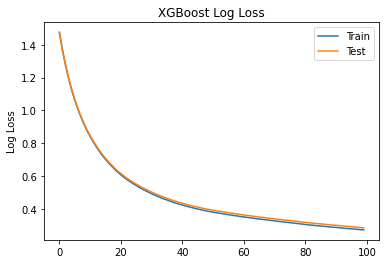

In [22]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

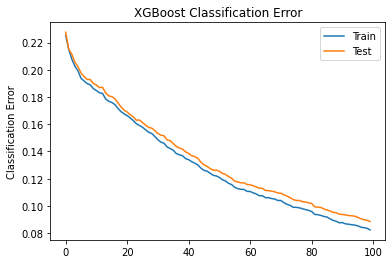

In [23]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()